# Marijuana Legalization and Violent Crime

In recent years, many US states have decided to legalize the use of marijuana. 

When these ideas were first proposed, there were many theories about the relationship between crime and the "War on Drugs" (the term given to US efforts to arrest drug users and dealers over the past several decades). 

In this exercise, we're going to test a few of those theories using drug arrest data from the state of California. 

Though California has passed a number of laws lessening penalities for marijuana possession over the years, arguably the biggest changes were in  2010, when the state changed the penalty for possessing a small amount of marijuana from a criminal crime to a "civil" penality (meaning those found guilty only had to pay a fine, not go to jail), though possessing, selling, or producing larger quantities remained illegal. Then in 2016, the state fully legalized marijuana for recreational use, not only making possession of small amounts legal, but also creating a regulatory system for producing marijuana for sale. 

Proponents of drug legalization have long argued that the war on drugs contributes to violent crime by creating an opportunity for drug dealers and organized crime to sell and distribute drugs, a business which tends to generate violence when gangs battle over territory. According to this theory, with drug legalization, we should see violent crime decrease after legalization in places where drug arrests had previously been common. 

**To be clear,** this is far from the only argument for drug legalization! It is simply the argument we are well positioned to analyze today. 

(Students from Practical Data Science: This should sound familiar! Last semester we did this analysis in a very simple, crude manner; in this class we'll do it rigorously with your new found difference-in-differences skills!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_2486/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Exercise 1

Download and import California arrest data from [https://www.github.com/nickeubank/MIDS_Data/UDS_arrest_data.csv](https://www.github.com/nickeubank/MIDS_Data/UDS_arrest_data.csv). What is a unit of observation (a single row) in this data? What entities are being tracked, and over what time period? (This data is derived from raw California arrest data from the State Attorney General's office [here](https://openjustice.doj.ca.gov/data), in the "Arrests" category.)

Note that `VIOLENT` is a count of arrests for violent offenses, and `F_DRUGOFF` is a count of felony drug arrests. `total_population` is total population. 

In [2]:
data = pd.read_csv(
    "https://media.githubusercontent.com/media/nickeubank/MIDS_Data/master/UDS_arrest_data.csv"
)
data.head()

,YEAR,COUNTY,VIOLENT,F_DRUGOFF,total_population
0,1980,Alameda County,4504,3569,1105379.0
1,1981,Alameda County,4699,3926,1122759.3
2,1982,Alameda County,4389,4436,1140139.6
3,1983,Alameda County,4500,5086,1157519.9
4,1984,Alameda County,3714,5878,1174900.2


> The dataset comprises yearly arrest data for each county in California, detailing counts of violent offenses (`VIOLENT`) and felony drug arrests (`F_DRUGOFF`) alongside the total population of the county (`total_population`). Each row represents data for one county in a specific year, reflecting the aggregate level of these types of crime incidents per county annually. This approach allows for analyzing trends in crime rates relative to population changes over the years.

## Exercise 2

In this analysis, we will split our sample into "treated" and "control" on the basis of whether a given county had a high average drug arrest rate in the three years before California began drug legalization in 2010. Counties with high drug arrest rates, after all, will be more impacted by drug liberalization policies. 

Calculate each county's average drug arrest *rate* for the period from 2007-2009. Then calculate the median value across counties, and create an indicator called `treated` for counties whose average drug arrest rate during this period was above the median average drug arrest rate. In other words, half your counties should be in the "treated" group, and half in "control". 

Note that this indicator should be *time-invariant*—if a county is in the treated group, it should always be identified as being in the treated group. 

In [3]:
data["drug_arrest_rate"] = (data["F_DRUGOFF"] / data["total_population"]) * 100000
data.head()

,YEAR,COUNTY,VIOLENT,F_DRUGOFF,total_population,drug_arrest_rate
0,1980,Alameda County,4504,3569,1105379.0,322.875683
1,1981,Alameda County,4699,3926,1122759.3,349.674236
2,1982,Alameda County,4389,4436,1140139.6,389.075162
3,1983,Alameda County,4500,5086,1157519.9,439.387694
4,1984,Alameda County,3714,5878,1174900.2,500.297813


In [4]:
subset = data[data["YEAR"].isin([2007, 2008, 2009])]
subset

,YEAR,COUNTY,VIOLENT,F_DRUGOFF,total_population,drug_arrest_rate
27,2007,Alameda County,4443,6071,1490312.0,407.364364
28,2008,Alameda County,4336,5893,1496965.0,393.663178
29,2009,Alameda County,4318,5749,1503618.0,382.344452
66,2007,Alpine County,8,1,1184.9,84.395308
67,2008,Alpine County,4,4,1181.6,338.524035
...,...,...,...,...,...,...
2212,2008,Yolo County,587,632,194411.2,325.084152
2213,2009,Yolo County,585,614,197630.1,310.681419
2250,2007,Yuba County,416,309,68574.2,450.606788
2251,2008,Yuba County,375,214,69767.8,306.731759


In [5]:
county_wise_rates = subset.groupby("COUNTY")["drug_arrest_rate"].mean()
county_wise_rates

COUNTY
Alameda County            394.457331
Alpine County             197.551801
Amador County             289.027292
Butte County              271.709690
Calaveras County          312.159811
Colusa County             209.450372
Contra Costa County       276.018946
Del Norte County          358.305449
El Dorado County          228.874748
Fresno County             473.876866
Glenn County              411.831533
Humboldt County           499.572904
Imperial County           460.694485
Inyo County               380.164074
Kern County               432.659812
Kings County              208.035930
Lake County               369.871380
Lassen County             147.165387
Los Angeles County        403.990696
Madera County             261.117203
Marin County              190.030996
Mariposa County           232.969880
Mendocino County          599.799767
Merced County             441.290221
Modoc County              211.204960
Mono County               272.602759
Monterey County           248.0

In [6]:
threshold = county_wise_rates.median()
threshold

301.8092992253924

In [7]:
mapping = (county_wise_rates > threshold).astype("int")
mapping.name = "treated"
mapping.head()

COUNTY
Alameda County      1
Alpine County       0
Amador County       0
Butte County        0
Calaveras County    1
Name: treated, dtype: int64

In [8]:
merged_data = pd.merge(data, mapping, on="COUNTY", how="left")
merged_data.head()

,YEAR,COUNTY,VIOLENT,F_DRUGOFF,total_population,drug_arrest_rate,treated
0,1980,Alameda County,4504,3569,1105379.0,322.875683,1
1,1981,Alameda County,4699,3926,1122759.3,349.674236,1
2,1982,Alameda County,4389,4436,1140139.6,389.075162,1
3,1983,Alameda County,4500,5086,1157519.9,439.387694,1
4,1984,Alameda County,3714,5878,1174900.2,500.297813,1


## Exercise 3

Our outcome in this analysis is the violent arrest rate -- if drug liberalization reduces crime overall, we would expect to see this rate fall in counties with high drug arrest rates after liberalization; if not, we would not expect to see any changes. Create a `violent_rate` variable with is violent arrests per 100,000 people. 

In [9]:
merged_data["violent_rate"] = (
    merged_data["VIOLENT"] / merged_data["total_population"]
) * 100000
merged_data.head()

,YEAR,COUNTY,VIOLENT,F_DRUGOFF,total_population,drug_arrest_rate,treated,violent_rate
0,1980,Alameda County,4504,3569,1105379.0,322.875683,1,407.462056
1,1981,Alameda County,4699,3926,1122759.3,349.674236,1,418.522474
2,1982,Alameda County,4389,4436,1140139.6,389.075162,1,384.952860
3,1983,Alameda County,4500,5086,1157519.9,439.387694,1,388.762215
4,1984,Alameda County,3714,5878,1174900.2,500.297813,1,316.111956


## Exercise 4

Differences-in-differences get their name from the fact that the estimator, in its most basic implementation, is just the difference between:

-  difference in the average change in outcome among eventually-treated units from before to after when treatment is applied, and
-  difference in the average change in outcome among never-treated units from before to after when treatment (to the treated units). 

(Obviously treatment is never a applied to the never-treated units -- when we talk about pre / post, we refer to before and after the point in time in which treatment is applied to the treated units. So if treated units are treated in 2008, then for the never-treated units, we are also comparing outcomes before 2008 to after 2008, even though 2008 has no special significance for the never-treated units). 

In its most basic implementation, therefore, calculating a difference-in-difference estimate requires calculating just 4 numbers:

- $\bar y_{T=1,Post}$  Avg for Treatment, Post-Treatment
- $\bar y_{T=0,Post}$  Avg for Control, Post-Treatment
- $\bar y_{T=1,Pre}$   Avg for Treatment, Pre-Treatment
- $\bar y_{T=0,Pre}$   Avg for Control, Pre-Treatment

The difference-in-differences estimator $\hat \delta$  is defined as

$$
\hat{\delta}= (\bar{y}_{T=1,\,Post}-\bar{y}_{T=1,\,Pre})-(\bar{y}_{T=0,\,Post}-\bar{y}_{T=0,\,Pre})
$$



Calculate (a) the change in violent arrest rates for our treated groups from before legalization to after ($\bar y_{T=1,Post} - \bar y_{T=1, Pre}$), and (b) our difference in difference estimator $\hat\delta$ by calculating these four values. Does doing your difference-in-difference estimate tell you something different from what you'd learn if you had just done a pre-post comparison?

For the `Pre` period, consider the three years before liberalization begins in 2010 (e.g. 2007-2009). For the `Post` period, consider the three years after final legalization took place (2016-2018). We will ignore the middle period in which marijuana was decriminalized but not yet legal. 

In [12]:
merged_data["post_period"] = (merged_data["YEAR"] >= 2010).astype("int")
pre_post = merged_data[merged_data["YEAR"].isin([2007, 2008, 2009, 2016, 2017, 2018])]

In [13]:
y_t1_post = pre_post.loc[
    (pre_post["treated"] == 1) & (pre_post["post_period"] == 1), "violent_rate"
].mean()
y_t0_post = pre_post.loc[
    (pre_post["treated"] == 0) & (pre_post["post_period"] == 1), "violent_rate"
].mean()
y_t1_pre = pre_post.loc[
    (pre_post["treated"] == 1) & (pre_post["post_period"] == 0), "violent_rate"
].mean()
y_t0_pre = pre_post.loc[
    (pre_post["treated"] == 0) & (pre_post["post_period"] == 0), "violent_rate"
].mean()

In [14]:
a = y_t1_post - y_t1_pre
b = (y_t1_post - y_t1_pre) - (y_t0_post - y_t0_pre)
print(a, b)

-26.79965007047747 -7.418061484004738


## Exercise 5

Now calculate $\hat\delta$ using a regression with an indicator for post-2010, an indicator for treated, and an interaction of the two. Use only the same set of years you used above. How does your estimate compare to the estimate you calculated in Exercise 4?

What does this tell you about interpretation of interaction terms with two indicator variables?

Note: You need to cluster your standard errors by county, since we expect counties (over time) to be subject to common fluctuations. 

In [16]:
import statsmodels.formula.api as smf

delta = smf.ols("violent_rate ~ post_period * treated", pre_post).fit()
delta.get_robustcov_results(cov_type="cluster", groups=pre_post["COUNTY"]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           violent_rate   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     11.00
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           8.45e-06
Time:                        16:27:25   Log-Likelihood:                -2094.1
No. Observations:                 348   AIC:                             4196.
Df Residuals:                     344   BIC:                             4212.
Df Model:                           3                                         
Covariance Type:              cluster                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             319.7820     17.638     18.131      0.000     284.463     355.101
post_period           -19.3816      9.892     -1.959      0.055     -39.189       0.426
treated               106.8289     23.385      4.568      0.000      60.001     153.657
post_period:treated    -7.4181     18.869     -0.393      0.696     -45.203      30.367
==============================================================================
Omnibus:                       53.945   Durbin-Watson:                   0.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.621
Skew:                           0.965   Prob(JB):                     1.89e-18
Kurtosis:                       4.380   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

> The interaction term coefficient of `-7.4181` shows a slightly mitigating effect of the treatment in the post 2010 period compared to what would be expected based on the main effects alone. The large p-value indicated this effect is not statistically significant.

## Exercise 6

In the preceding exercise, we did a simple pre-post / treated-control comparison. But one important limitation of these designs is that they do not allow us to test for *parallel trends*. 

**Plot** a difference-in-difference model using data from 2000-2009 (inclusive) and from 2016-2018 (inclusive). Note this will have four different geometric components: a time trend for treated counties pre-2010, a time trend for control counties pre-2010, a time trend for treated counties post-2016 (include 2016), and a time trend for control counties post-2016 (include 2016). 

Do you see evidence of parallel trends for these two datasets? Does that make you feel more or less confident in your diff-in-diff estimates?

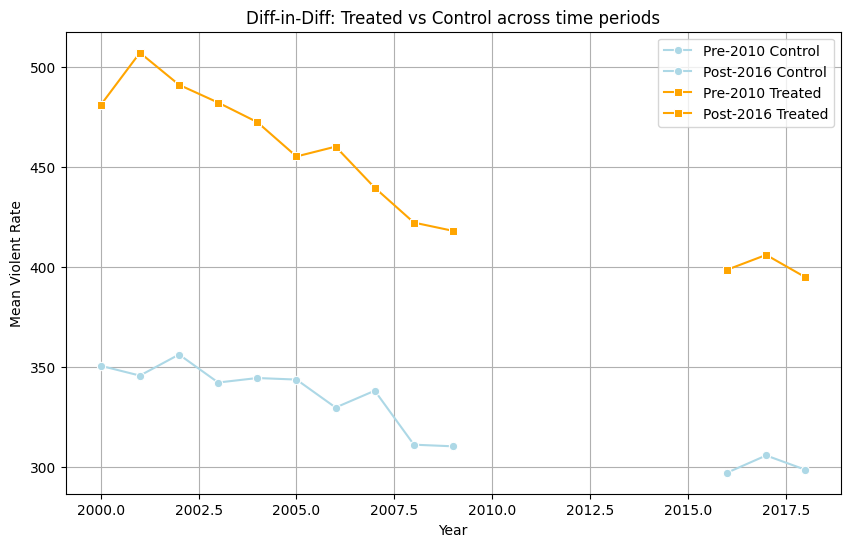

In [19]:
import seaborn as sns


parallel_trends = merged_data.query("(2000 <= YEAR <= 2009) or (2016 <= YEAR <= 2018)")

# mean
grouped_means = (
    parallel_trends.groupby(["YEAR", "treated"])["violent_rate"].mean().reset_index()
)

plt.figure(figsize=(10, 6))
markers = {0: "o", 1: "s"}
colors = {0: "lightblue", 1: "orange"}

# plotting trends
for treated in [0, 1]:
    pre_data = grouped_means[
        (grouped_means["YEAR"] <= 2009) & (grouped_means["treated"] == treated)
    ]
    post_data = grouped_means[
        (grouped_means["YEAR"] >= 2016) & (grouped_means["treated"] == treated)
    ]

    # pre-2010 trends
    sns.lineplot(
        data=pre_data,
        x="YEAR",
        y="violent_rate",
        marker=markers[treated],
        color=colors[treated],
        label=f'Pre-2010 {"Treated" if treated else "Control"}',
    )

    # post-2016
    sns.lineplot(
        data=post_data,
        x="YEAR",
        y="violent_rate",
        marker=markers[treated],
        color=colors[treated],
        label=f'Post-2016 {"Treated" if treated else "Control"}',
    )

plt.title("Diff-in-Diff: Treated vs Control across time periods")
plt.xlabel("Year")
plt.ylabel("Mean Violent Rate")
plt.legend()
plt.grid(True)
plt.show()

> There are definitely parallel trends in this data especially these peaks repeating each other. I feel less confident in my diff-in-diff analysis now.

## Exercise 7

While we can estimate the model described above precisely as a regression, it's actually much easier to estimate a more flexible model by running the regression we ran in Exercise 5 but with both `county` and `year` fixed effects. Use `PanelOLS` (or `lfe` in R) to estimate this fixed effects regression. 

With all these additional fixed effects, do you find evidence that marijuana legalization reduced violent crime?

In [22]:
from linearmodels import PanelOLS

ex7 = pre_post.set_index(["COUNTY", "YEAR"])

mod = PanelOLS.from_formula(
    "violent_rate ~ treated * post_period + EntityEffects + TimeEffects",
    data=ex7,
    drop_absorbed=True,
)

res = mod.fit(cov_type="clustered", cluster_entity=True)

print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:           violent_rate   R-squared:                        0.0013
Estimator:                   PanelOLS   R-squared (Between):             -0.0109
No. Observations:                 348   R-squared (Within):               0.0155
Date:                Fri, Apr 19 2024   R-squared (Overall):             -0.0104
Time:                        18:03:38   Log-likelihood                   -1858.7
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      0.3829
Entities:                          58   P-value                           0.5366
Avg Obs:                       6.0000   Distribution:                   F(1,284)
Min Obs:                       6.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             0.1295
                            

/tmp/ipykernel_2486/3144923703.py:7: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

treated, post_period

  res = mod.fit(cov_type='clustered', cluster_entity=True)


**fixed effect:**

In [25]:
df_parallel = parallel_trends.set_index(["COUNTY", "YEAR"])

In [26]:
mod = PanelOLS.from_formula(
    "violent_rate ~ treated * post_period + TimeEffects + EntityEffects",
    data=df_parallel,
    drop_absorbed=True,
)

res = mod.fit(cov_type="clustered", cluster_entity=True)

print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:           violent_rate   R-squared:                        0.0097
Estimator:                   PanelOLS   R-squared (Between):             -0.0168
No. Observations:                 754   R-squared (Within):               0.0588
Date:                Fri, Apr 19 2024   R-squared (Overall):             -0.0150
Time:                        18:09:54   Log-likelihood                   -4108.4
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6.6568
Entities:                          58   P-value                           0.0101
Avg Obs:                       13.000   Distribution:                   F(1,683)
Min Obs:                       13.000                                           
Max Obs:                       13.000   F-statistic (robust):             1.9504
                            

/tmp/ipykernel_2486/2055765695.py:3: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

treated, post_period

  res = mod.fit(cov_type="clustered", cluster_entity=True)


> Although the estimated coefficient suggests a reduction in violent crime rates following marijuana legalization, the lack of statistical significance means there is not enough evidence to confidently state that marijuana legalization has reduced violent crime rates based on this model.